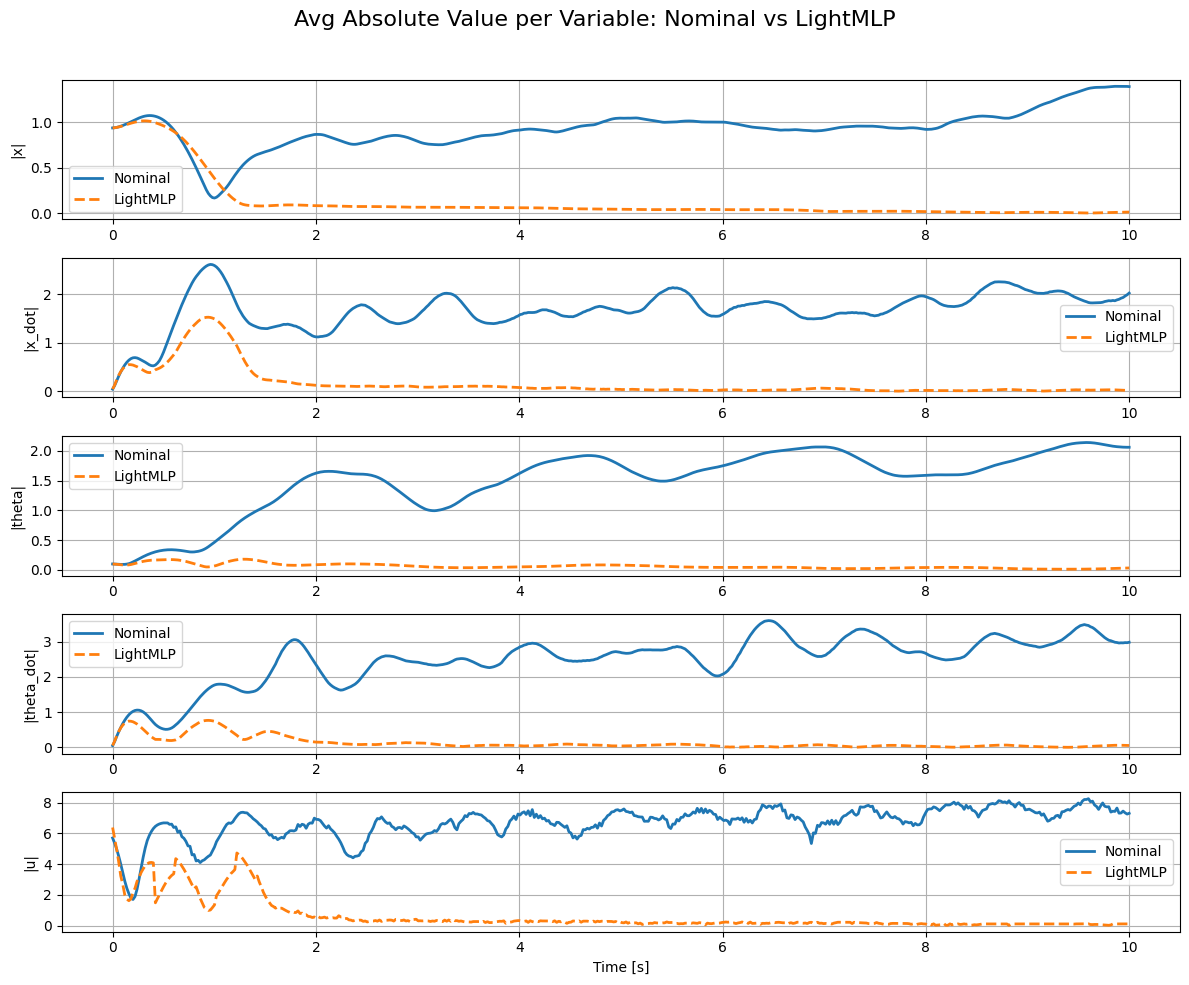

In [16]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------------------------
# Configuration
results_dir = "results"
seeds = np.arange(1, 101)  # You can change this if needed
nominal_files = [f"nominal_seed{seed}.csv" for seed in seeds]
lightmlp_files = [f"lightmlp_seed{seed}.csv" for seed in seeds]
variables = ["x", "x_dot", "theta", "theta_dot", "u"]

# ------------------------------------------------------------------------------
def load_csv_group(filenames):
    dataframes = []
    for fname in filenames:
        path = os.path.join(results_dir, fname)
        if os.path.exists(path):
            df = pd.read_csv(path)
            dataframes.append(df)
        else:
            print(f"Warning: {fname} not found.")
    return dataframes

def compute_avg_abs(dataframes, variables):
    min_len = min(len(df) for df in dataframes)
    dataframes = [df.iloc[:min_len] for df in dataframes]
    time = dataframes[0]["time"].values
    avg_abs = {}
    for var in variables:
        stacked = np.stack([np.abs(df[var].values) for df in dataframes], axis=0)
        avg_abs[var] = np.mean(stacked, axis=0)
    return time, avg_abs

# ------------------------------------------------------------------------------
# Load and compute both groups
nominal_dfs = load_csv_group(nominal_files)
lightmlp_dfs = load_csv_group(lightmlp_files)

time, avg_abs_nominal = compute_avg_abs(nominal_dfs, variables)
_,    avg_abs_lightmlp = compute_avg_abs(lightmlp_dfs, variables)

# ------------------------------------------------------------------------------
# Plot comparison
plt.figure(figsize=(12, 10))
for i, var in enumerate(variables):
    plt.subplot(len(variables), 1, i+1)
    plt.plot(time, avg_abs_nominal[var], label="Nominal", linewidth=2)
    plt.plot(time, avg_abs_lightmlp[var], label="LightMLP", linewidth=2, linestyle='--')
    plt.ylabel(f"|{var}|")
    plt.grid()
    plt.legend()

plt.xlabel("Time [s]")
plt.suptitle("Avg Absolute Value per Variable: Nominal vs LightMLP", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


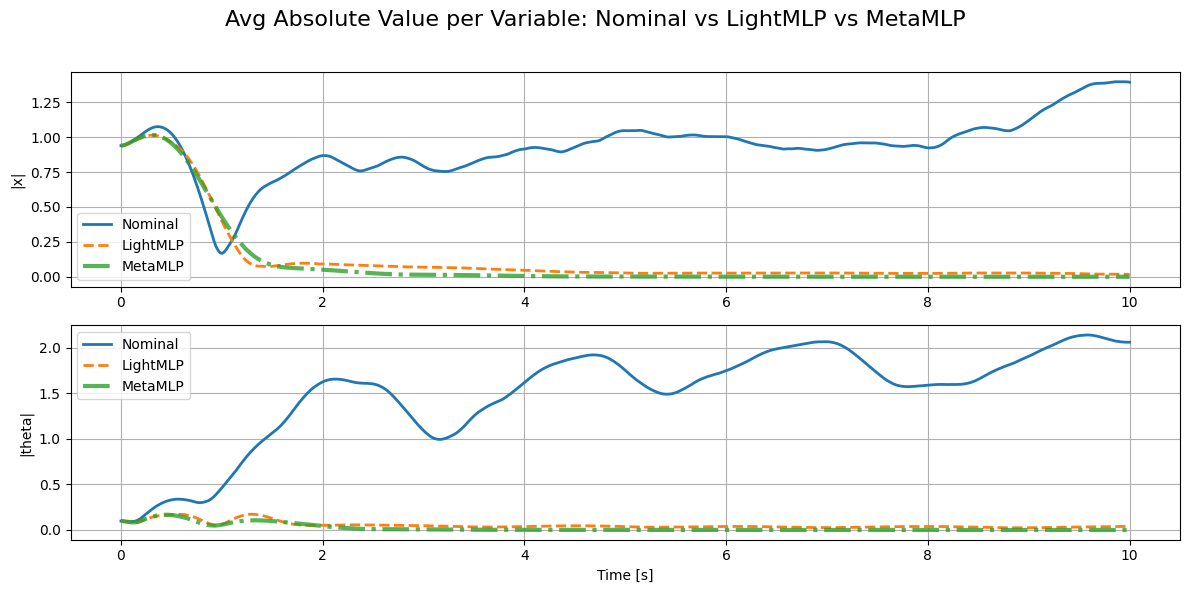

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------------------------
# Configuration
results_dir = "results"
seeds = range(1,101)
variables = ["x", "theta"]  # Removed "u"

# File groups
nominal_files   = [f"nominal_seed{seed}.csv" for seed in seeds]
lightmlp_files  = [f"lightmlp_seed{seed}.csv" for seed in seeds]
metamlp_files   = [f"metamlp_seed{seed}.csv" for seed in seeds]

# ------------------------------------------------------------------------------
def load_csv_group(filenames):
    dataframes = []
    for fname in filenames:
        path = os.path.join(results_dir, fname)
        if os.path.exists(path):
            df = pd.read_csv(path)
            dataframes.append(df)
        else:
            print(f"Warning: {fname} not found.")
    return dataframes

def compute_avg_abs(dataframes, variables):
    min_len = min(len(df) for df in dataframes)
    dataframes = [df.iloc[:min_len] for df in dataframes]
    time = dataframes[0]["time"].values
    avg_abs = {}
    for var in variables:
        stacked = np.stack([np.abs(df[var].values) for df in dataframes], axis=0)
        avg_abs[var] = np.mean(stacked, axis=0)
    return time, avg_abs

# ------------------------------------------------------------------------------
# Load and compute all groups
nominal_dfs   = load_csv_group(nominal_files)
lightmlp_dfs  = load_csv_group(lightmlp_files)
metamlp_dfs   = load_csv_group(metamlp_files)

time, avg_abs_nominal  = compute_avg_abs(nominal_dfs, variables)
_,    avg_abs_lightmlp = compute_avg_abs(lightmlp_dfs, variables)
_,    avg_abs_metamlp  = compute_avg_abs(metamlp_dfs, variables)

# ------------------------------------------------------------------------------
# Plot comparison
plt.figure(figsize=(12, 6))
for i, var in enumerate(variables):
    plt.subplot(len(variables), 1, i+1)
    plt.plot(time, avg_abs_nominal[var], label="Nominal", linewidth=2)
    plt.plot(time, avg_abs_lightmlp[var], label="LightMLP", linewidth=2, linestyle='--')
    plt.plot(time, avg_abs_metamlp[var], label="MetaMLP", linewidth=3, linestyle='-.', alpha=0.8)
    plt.ylabel(f"|{var}|")
    plt.grid()
    plt.legend()

plt.xlabel("Time [s]")
plt.suptitle("Avg Absolute Value per Variable: Nominal vs LightMLP vs MetaMLP", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------------------------
# Configuration
results_dir = "results"

# File groups
nominal_file   = os.path.join(results_dir, "nominal_success_rate.csv")
lightmlp_file   = os.path.join(results_dir, "lightmlp_success_rate.csv")
metamlp_file   = os.path.join(results_dir, "metamlp_success_rate.csv")

def compute_success(filename):
    success_array = np.loadtxt(filename, delimiter=",")
    success_num = 0
    success_totaltime = 0
    total_num = success_array.shape[1]
    for id in range(total_num):
        if success_array[1,id]:
            success_num+=1
            success_totaltime+=success_array[2,id]

    success_rate = success_num/total_num
    # print(f"total num: {total_num}")
    # print(f"success_mum: {success_num}")
    if success_num > 0:
        avg_donetime = success_totaltime/success_num
    else:
        avg_donetime = -1
    return success_rate,avg_donetime

success_rate_nom, avg_donetime_nom = compute_success(nominal_file)
success_rate_light, avg_donetime_light = compute_success(lightmlp_file)
success_rate_meta, avg_donetime_meta = compute_success(metamlp_file)

print(f"success rate for Nominal: {success_rate_nom:.2f}, average done time for Nominal: {avg_donetime_nom:.2f}s")
print(f"success rate for LightMLP: {success_rate_light:.2f}, average done time for LightMLP: {avg_donetime_light:.2f}s")
print(f"success rate for MetaMLP: {success_rate_meta:.2f}, average done time for MetaMLP: {avg_donetime_meta:.2f}s")



success rate for Nominal: 0.00, average done time for Nominal: -1.00s
success rate for LightMLP: 0.99, average done time for LightMLP: 3.72s
success rate for MetaMLP: 1.00, average done time for MetaMLP: 2.55s
